## Purpose:

Examine current list of shapefiles to perform joins in the `Complete Analysis Example Counts by Typologies` series to check if it has the correct attributes to conduct the analysis and if it is using the correct coordinate reference system.

We also wanted to ensure that the new standardization for running regressions over the dependent variable (Displacement/Gentrification vulnerability) was aligned in a way that would produce more robust results.

In [1]:
import geopandas as gpd 
import pandas as pd 
import numpy as np
from pathlib import Path, PureWindowsPath

In [2]:
shp_path = Path("../../../../Box/Twitter data/Observation Shapefiles")

## Sydney, Australia 
The Sydney Australia shapefile needs to be updated with the correct abbreviations

In [113]:
# read in sydney's shapefile
sydney = gpd.read_file(shp_path/"syd.geojson")

Sydney shapefile is missing the actual names that it was given for the typology. Need to perform a join on the file and then re-write it as a .geojson

In [114]:
# read in the typology file that gives the names for each of the typologies 
#type_update = pd.read_csv("C:/Users/emman/Box/Twitter data/Asia/Sydney/Typology_Finals.csv")

In [115]:
# keep only the types integers and the typology name 
#type_update = type_update[['types','Typology_ID']]

In [116]:
# drop all duplicate values 
#type_update.drop_duplicates(inplace=True)

In [117]:
# perform a left merge on the Sydney to keep geometries 
#sydney = sydney.merge(type_update,on='types')

In [118]:
sydney

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,OID,SA2_MAINCODE_2016,rentals_ov100_11,types,Typology_ID,geometry
0,115011290,11290,Baulkham Hills (East),11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.3081,1,115011290,1,-1,HI - Stable Exclusion,"POLYGON ((150.97069 -33.75928, 150.97071 -33.7..."
1,115011291,11291,Baulkham Hills (West) - Bella Vista,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,10.9631,2,115011291,1,-1,HI - Stable Exclusion,"POLYGON ((150.94715 -33.74089, 150.94704 -33.7..."
2,115011294,11294,Glenhaven,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.2309,3,115011294,1,-1,HI - Stable Exclusion,"POLYGON ((150.98461 -33.70294, 150.98468 -33.7..."
3,115011296,11296,West Pennant Hills,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.8291,4,115011296,1,-1,HI - Stable Exclusion,"POLYGON ((151.02214 -33.73881, 151.02214 -33.7..."
4,115011553,11553,Castle Hill - Central,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1512,5,115011553,1,-1,HI - Stable Exclusion,"POLYGON ((150.97343 -33.73437, 150.97332 -33.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,127021514,11514,Edensor Park,12702,Fairfield,127,Sydney - South West,1GSYD,Greater Sydney,1,New South Wales,3.0955,235,127021514,1,1,LI - Low Risk: Gent/Disp,"POLYGON ((150.86790 -33.87758, 150.86811 -33.8..."
261,127021517,11517,Greenfield Park - Prairiewood,12702,Fairfield,127,Sydney - South West,1GSYD,Greater Sydney,1,New South Wales,3.6367,238,127021517,1,1,LI - Low Risk: Gent/Disp,"POLYGON ((150.89576 -33.86886, 150.89592 -33.8..."
262,127031522,11522,Casula,12703,Liverpool,127,Sydney - South West,1GSYD,Greater Sydney,1,New South Wales,7.0719,243,127031522,1,1,LI - Low Risk: Gent/Disp,"POLYGON ((150.89579 -33.94621, 150.89570 -33.9..."
263,127031523,11523,Chipping Norton - Moorebank,12703,Liverpool,127,Sydney - South West,1GSYD,Greater Sydney,1,New South Wales,14.4902,244,127031523,1,1,LI - Low Risk: Gent/Disp,"POLYGON ((150.92811 -33.92689, 150.92812 -33.9..."


In [119]:
sydney['standardized_types'] = sydney.Typology_ID

In [122]:
# replace the values standardized types with new data


sydney.standardized_types.replace({'HI - Stable Exclusion':'Exclusive Static',
                                               'HI - Undergoing Exclusion':'Exclusive Dynamic',
                                               'LI - Undergoing Gent/Disp' :'Low Income, Undergoing Change',
                                               'LI - High Risk: Gent/Disp': 'Low Income, At Risk of Change',
                                               'LI - Low Risk: Gent/Disp': 'Low Income, Stable'},inplace=True)



In [123]:
sydney

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,OID,SA2_MAINCODE_2016,rentals_ov100_11,types,Typology_ID,geometry,standardized_types
0,115011290,11290,Baulkham Hills (East),11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.3081,1,115011290,1,-1,HI - Stable Exclusion,"POLYGON ((150.97069 -33.75928, 150.97071 -33.7...",Exclusive Static
1,115011291,11291,Baulkham Hills (West) - Bella Vista,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,10.9631,2,115011291,1,-1,HI - Stable Exclusion,"POLYGON ((150.94715 -33.74089, 150.94704 -33.7...",Exclusive Static
2,115011294,11294,Glenhaven,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.2309,3,115011294,1,-1,HI - Stable Exclusion,"POLYGON ((150.98461 -33.70294, 150.98468 -33.7...",Exclusive Static
3,115011296,11296,West Pennant Hills,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.8291,4,115011296,1,-1,HI - Stable Exclusion,"POLYGON ((151.02214 -33.73881, 151.02214 -33.7...",Exclusive Static
4,115011553,11553,Castle Hill - Central,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1512,5,115011553,1,-1,HI - Stable Exclusion,"POLYGON ((150.97343 -33.73437, 150.97332 -33.7...",Exclusive Static
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,127021514,11514,Edensor Park,12702,Fairfield,127,Sydney - South West,1GSYD,Greater Sydney,1,New South Wales,3.0955,235,127021514,1,1,LI - Low Risk: Gent/Disp,"POLYGON ((150.86790 -33.87758, 150.86811 -33.8...","Low Income, Stable"
261,127021517,11517,Greenfield Park - Prairiewood,12702,Fairfield,127,Sydney - South West,1GSYD,Greater Sydney,1,New South Wales,3.6367,238,127021517,1,1,LI - Low Risk: Gent/Disp,"POLYGON ((150.89576 -33.86886, 150.89592 -33.8...","Low Income, Stable"
262,127031522,11522,Casula,12703,Liverpool,127,Sydney - South West,1GSYD,Greater Sydney,1,New South Wales,7.0719,243,127031522,1,1,LI - Low Risk: Gent/Disp,"POLYGON ((150.89579 -33.94621, 150.89570 -33.9...","Low Income, Stable"
263,127031523,11523,Chipping Norton - Moorebank,12703,Liverpool,127,Sydney - South West,1GSYD,Greater Sydney,1,New South Wales,14.4902,244,127031523,1,1,LI - Low Risk: Gent/Disp,"POLYGON ((150.92811 -33.92689, 150.92812 -33.9...","Low Income, Stable"


In [124]:
#sydney.to_file("C:/Users/emman/Box/Twitter data/Observation Shapefiles/syd.geojson", driver='GeoJSON')

# San Francisco, California

San Francisco looks like it is all good to go! 

In [54]:
#sf = gpd.read_file(shp_path/"sf.geojson")

In [55]:
#sf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   STATEFP                 1582 non-null   object  
 1   COUNTYFP                1582 non-null   object  
 2   TRACTCE                 1582 non-null   object  
 3   GEOID                   1582 non-null   object  
 4   NAME                    1582 non-null   object  
 5   NAMELSAD                1582 non-null   object  
 6   MTFCC                   1582 non-null   object  
 7   FUNCSTAT                1582 non-null   object  
 8   ALAND                   1582 non-null   int64   
 9   AWATER                  1582 non-null   int64   
 10  INTPTLAT                1582 non-null   object  
 11  INTPTLON                1582 non-null   object  
 12  comgenin00              0 non-null      object  
 13  geo_fips                1582 non-null   int64   
 14  aboverm_per_col1

In [57]:
sf.disp_type.value_counts()

LI - Not Losing Low Income Households or Very Early Stages of Gentrification/Displacement     367
MHI - At Risk of Exclusion                                                                    331
MHI - Ongoing Exclusion                                                                       187
LI - At Risk of Gentrification and/or Displacement                                            186
MHI - Not Losing Low Income Households or Very Early Stages of Displacement                   182
LI - Ongoing Gentrification                                                                   165
Advanced Gentrification                                                                        84
LI - Undergoing Displacement                                                                   58
College Town                                                                                   11
Name: disp_type, dtype: int64

In [125]:
#sf['standardized_types'] = sf['disp_type']

In [127]:
# sf.standardized_types.replace({'LI - Ongoing Gentrification': 'Low Income, Undergoing Change',
#                                'LI - At Risk of Gentrification and/or Displacement':'Low Income, At Risk of Change',
#                                'LI - Undergoing Displacement':'Low Income, Undergoing Change',
#                                'LI - Undergoing Gent/Disp' :'Low Income, Undergoing Change',
#                                'MHI - At Risk of Exclusion':'Exclusive Static',
#                                'LI - Not Losing Low Income Households or Very Early Stages of Gentrification/Displacement ':'Low Income, Stable',
#                                'MHI - Ongoing Exclusion':'Exclusive Dynamic',
#                                'MHI - Not Losing Low Income Households or Very Early Stages of Displacement':'Exclusive Static',
#                                'Advanced Gentrification':'Exclusive Dynamic',
#                                'College Town':'Other'},inplace=True)

In [128]:
sf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,aboverm_per_nhblk15,aboverm_per_asian15,aboverm_density15,aboverm_per_hisp15,disp_type,LI_under80AMI,HI_above120AMI,MI_80_120AMI,geometry,standardized_types
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,...,0.0,1.0,0,1.0,MHI - At Risk of Exclusion,0,1,0,"POLYGON ((-122.01721 37.53932, -122.01719 37.5...",Exclusive Static
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,...,1.0,1.0,0,1.0,MHI - Not Losing Low Income Households or Very...,0,1,0,"POLYGON ((-122.00230 37.52984, -122.00224 37.5...",Exclusive Static
2,06,001,442900,06001442900,4429,Census Tract 4429,G5020,S,2066524,0,...,1.0,1.0,1,1.0,MHI - Not Losing Low Income Households or Very...,0,1,0,"POLYGON ((-121.98773 37.52248, -121.98765 37.5...",Exclusive Static
3,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,...,0.0,1.0,1,1.0,MHI - Not Losing Low Income Households or Very...,0,1,0,"POLYGON ((-121.95760 37.52392, -121.95745 37.5...",Exclusive Static
4,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,...,0.0,1.0,1,1.0,MHI - Not Losing Low Income Households or Very...,0,0,1,"POLYGON ((-121.96900 37.52248, -121.96885 37.5...",Exclusive Static
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,06,013,366002,06013366002,3660.02,Census Tract 3660.02,G5020,S,1033959,0,...,1.0,1.0,1,1.0,LI - At Risk of Gentrification and/or Displace...,1,0,0,"POLYGON ((-122.35649 37.96677, -122.35639 37.9...","Low Income, At Risk of Change"
1578,06,013,313102,06013313102,3131.02,Census Tract 3131.02,G5020,S,1993613,0,...,1.0,0.0,0,1.0,LI - Not Losing Low Income Households or Very ...,1,0,0,"POLYGON ((-121.87398 37.99936, -121.87396 37.9...","Low Income, Stable"
1579,06,013,316000,06013316000,3160,Census Tract 3160,G5020,S,1521060,1354774,...,1.0,0.0,0,1.0,LI - Undergoing Displacement,1,0,0,"POLYGON ((-122.15815 38.02488, -122.15720 38.0...","Low Income, Undergoing Change"
1580,06,013,314102,06013314102,3141.02,Census Tract 3141.02,G5020,S,4883012,643498,...,1.0,0.0,0,1.0,LI - At Risk of Gentrification and/or Displace...,1,0,0,"POLYGON ((-121.93074 38.02691, -121.93052 38.0...","Low Income, At Risk of Change"


In [59]:
sf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [129]:
#sf.to_file("C:/Users/emman/Box/Twitter data/Observation Shapefiles/sf.geojson", driver='GeoJSON')

# New York, New York

In [29]:
# read in sydney's shapefile
zipfile = shp_path/"NY_non_neighbor.shp"
ny = gpd.read_file(zipfile)

<AxesSubplot:>

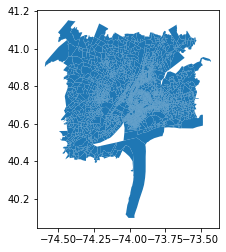

In [30]:
ny.plot()

In [31]:
ny.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3486 entries, 0 to 3485
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     3486 non-null   object  
 1   COUNTYFP    3486 non-null   object  
 2   TRACTCE     3486 non-null   object  
 3   GEOID       3486 non-null   object  
 4   NAME        3486 non-null   object  
 5   NAMELSAD    3486 non-null   object  
 6   MTFCC       3486 non-null   object  
 7   FUNCSTAT    3486 non-null   object  
 8   ALAND       3486 non-null   float64 
 9   AWATER      3486 non-null   float64 
 10  INTPTLAT    3486 non-null   object  
 11  INTPTLON    3486 non-null   object  
 12  tract_join  3486 non-null   float64 
 13  percent_ht  3486 non-null   float64 
 14  tract_      3486 non-null   float64 
 15  Field1      3486 non-null   int64   
 16  tract       3486 non-null   float64 
 17  ct_othertw  3486 non-null   float64 
 18  ct_other_1  3486 non-null   float64 
 19

# Hong Kong, China

In [60]:
hk = gpd.read_file(shp_path/"hk.geojson")

In [61]:
hk.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      5034 non-null   int64   
 1   PPU           5034 non-null   int64   
 2   SPU           5034 non-null   int64   
 3   TPU           5034 non-null   int64   
 4   SB_VC         5034 non-null   int64   
 5   TYPE_Eng      5034 non-null   object  
 6   TYPE_TC       5034 non-null   object  
 7   TYPE_SC       5034 non-null   object  
 8   Shape_Length  5034 non-null   float64 
 9   Shape_Area    5034 non-null   float64 
 10  category      5034 non-null   int64   
 11  label         5034 non-null   object  
 12  geometry      5034 non-null   geometry
dtypes: float64(2), geometry(1), int64(6), object(4)
memory usage: 511.4+ KB


In [62]:
hk.category.value_counts()

6    1842
1    1571
2     782
4     423
3     259
5     157
Name: category, dtype: int64

In [64]:
hk.label.value_counts()

No Category                              1842
Not Currently at Risk of Displacement    1571
At Risk of Displacement                   782
Exclusive                                 423
Undergoing Displacement                   259
Very Exclusive                            157
Name: label, dtype: int64

In [130]:
hk['standardized_types'] = hk['label']

In [135]:
hk.standardized_types.replace({'At Risk of Displacement':'Low Income, At Risk of Change',
                               'Exclusive':'Exclusive Static',
                               'No Category':'Other',
                               'Not Currently at Risk of Displacement':'Low Income, Stable',
                               'Undergoing Displacement':'Low Income, Undergoing Change',
                               'Very Exclusive':'Exclusive Static'},inplace=True)

In [140]:
hk.crs

<Projected CRS: EPSG:2326>
Name: Hong Kong 1980 Grid System
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: China - Hong Kong
- bounds: (113.76, 22.13, 114.51, 22.58)
Coordinate Operation:
- name: Hong Kong 1980 Grid
- method: Transverse Mercator
Datum: Hong Kong 1980
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [141]:
#hk.to_file("C:/Users/emman/Box/Twitter data/Observation Shapefiles/hk.geojson", driver='GeoJSON',encoding='UTF-8')

# Bogota, Colombia 


In [3]:
bog = gpd.read_file('C:/Users/emman/Box/Twitter data/Observation Shapefiles/03 FinalBogota Urban Displacement Project (for web)/BogotaTypologyForWeb3.shp')

In [4]:
bog.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SECU_CCNCT  2720 non-null   object  
 1   secu_r6     2720 non-null   int64   
 2   vuln_empl   2720 non-null   float64 
 3   vuln_pinfr  2720 non-null   float64 
 4   vuln_hsedu  2720 non-null   float64 
 5   vuln_clstr  2711 non-null   object  
 6   vuln_total  2711 non-null   object  
 7   gnt_psed93  2720 non-null   float64 
 8   gnt_psed05  2720 non-null   float64 
 9   gnt_psechn  2720 non-null   float64 
 10  gnt_rentgp  2720 non-null   float64 
 11  gnt_total   2711 non-null   object  
 12  dsp_pred93  2720 non-null   float64 
 13  dsp_pred05  2720 non-null   float64 
 14  dsp_predch  2720 non-null   float64 
 15  dsp_total   2711 non-null   object  
 16  excl_11     2720 non-null   float64 
 17  excl_17     2720 non-null   float64 
 18  excl_total  2711 non-null   object  
 19

In [24]:
bog['standardized_types'] = bog.typology

In [25]:
bog.typology.value_counts()

Displacement + Vulnerability                     1051
none                                              457
Displacement                                      330
Exclusion                                         292
Gentrification                                    287
Gentrification + Displacement + Vulnerability     126
Gentrification + Displacement                      77
Vulnerability                                      46
Exclusion + Vulnerability                          25
Gentrification + Vulnerability                     20
Name: typology, dtype: int64

In [26]:
bog.standardized_types.replace({'Gentrification + Displacement + Vulnerability':'Low Income, Undergoing Change',
                               'Gentrification + Displacement':'Low Income, Undergoing Change',
                               'Gentrification + Vulnerability':'Low Income, Undergoing Change',
                               'Exclusion + Vulnerability':'Exclusive, Dynamic',
                               'Gentrification':'Low Income, Undergoing Change',
                               'Displacement + Vulnerability':'Low Income, Undergoing Change',
                               'Displacement':'Low Income, At Risk of Change',
                               'Exclusion':'Exclusive Static',
                               'Mixed Income':'Exclusive Dynamic',
                               'Not Enough Information':'Other',
                               'none':'Other'},inplace=True)

In [27]:
bog.standardized_types.value_counts()

Low Income, Undergoing Change    1561
Other                             457
Low Income, At Risk of Change     330
Exclusive Static                  292
Vulnerability                      46
Exclusive, Dynamic                 25
Name: standardized_types, dtype: int64

In [28]:
bog.to_crs("EPSG:4326")

,SECU_CCNCT,secu_r6,vuln_empl,vuln_pinfr,vuln_hsedu,vuln_clstr,vuln_total,gnt_psed93,gnt_psed05,gnt_psechn,...,dsp_pred93,dsp_pred05,dsp_predch,dsp_total,excl_11,excl_17,excl_total,typology,geometry,standardized_types
0,11001100000000110101,110101,0.037861,0.035258,0.449124,Low Education,Not Vulnerable,0.028965,0.142451,0.113487,...,0.028965,0.311642,0.282677,Displacement,0.0,0.0,No Exclusion,Displacement,"POLYGON ((-74.07690 4.57897, -74.07705 4.57888...","Low Income, At Risk of Change"
1,11001100000000110201,110201,0.034989,0.021068,0.410459,None,Not Vulnerable,0.068302,0.065087,-0.003216,...,0.068302,0.267871,0.199568,Displacement,0.0,0.0,No Exclusion,Displacement,"POLYGON ((-74.07765 4.57814, -74.07754 4.57813...","Low Income, At Risk of Change"
2,11001100000000110202,110202,0.044252,0.023427,0.516703,High Unemployment + Low Education,Vulnerable,0.073834,0.071584,-0.002250,...,0.073834,0.321475,0.247641,Displacement,0.0,0.0,No Exclusion,Displacement + Vulnerability,"POLYGON ((-74.07489 4.57547, -74.07491 4.57527...","Low Income, Undergoing Change"
3,11001100000000110203,110203,0.046318,0.033812,0.535896,High Unemployment + Low Education,Vulnerable,0.048585,0.048170,-0.000415,...,0.048585,0.343214,0.294629,Displacement,0.0,0.0,No Exclusion,Displacement + Vulnerability,"POLYGON ((-74.07477 4.57818, -74.07449 4.57792...","Low Income, Undergoing Change"
4,11001100000000110301,110301,0.038582,0.024237,0.507667,Low Education,Not Vulnerable,0.057509,0.054081,-0.003428,...,0.057509,0.323495,0.265986,Displacement,0.0,0.0,No Exclusion,Displacement,"POLYGON ((-74.07219 4.57585, -74.07201 4.57581...","Low Income, At Risk of Change"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,11001100000000241502,241502,0.000000,0.000000,0.000000,None,None,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,None,0.0,0.0,None,None,"POLYGON ((-74.14760 4.58587, -74.14749 4.58577...",None
2716,11001100000000242801,242801,0.000000,0.000000,0.000000,None,None,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,None,0.0,0.0,None,None,"POLYGON ((-74.16065 4.55952, -74.16065 4.55950...",None
2717,11001100000000254201,254201,0.000000,0.000000,0.000000,None,None,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,None,0.0,0.0,None,None,"POLYGON ((-74.11935 4.51773, -74.11922 4.51753...",None
2718,11001100000000255702,255702,0.000000,0.000000,0.000000,None,None,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,None,0.0,0.0,None,None,"POLYGON ((-74.11685 4.49194, -74.11677 4.49193...",None


In [29]:
bog.to_file("C:/Users/emman/Box/Twitter data/Observation Shapefiles/bog.geojson", driver='GeoJSON',encoding='UTF-8')